# 0 - Importando Bibliotecas

In [1]:
#!pip3 install nltk
#!pip3 install wordcloud

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import re 
import string

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
#Setting up nltk with vader lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\0\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# 1 - Leitura e Importação dos Dados de Entrada

## Definindo o PATH dos arquivos

In [33]:
# Arquivos obtidos de fontes externas
file_toronto_listings = "../2-data/input/Toronto_2021-02-08/listings.csv"

# Onde salvar os arquivos com dados gerados, para utilização no script principal
processed_files = '../2-data/generated/'

# Onde vamos salvar as figuras geradas, para utilização no relatório
final_figures = '../3-report/figures/'

In [5]:
df = pd.read_csv(file_toronto_listings, index_col = 'id')

In [6]:
## Basic Configs (.ipynb)
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', len(df.columns))
pd.set_option('display.width', 1000)

# 2 - Processamento e limpeza dos dados

In [7]:
print(df['description'].isna().sum())
#df["name"].isna().sum()
#df["name"].dropna()

565


In [8]:
# Removendo valores N/A da coluna 'description', visto que esses não poderiam ter seu texto analisado

columnToProcess = 'description'
df.dropna(subset = [columnToProcess],how='any',axis=0,inplace=True)

In [9]:
# As descrições em varios erros de importação e inconsisências que iriam atrapalhar no processamento.
# Esses vão ser removidos com esses filtros

importingArtifacts = lambda x: x.replace("<br />","").replace("<b>","").replace("</b>","").replace("<b","")
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punctuation = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

In [10]:
df[columnToProcess] = df[columnToProcess].map(importingArtifacts).map(alphanumeric).map(punctuation)

In [11]:
df.head(2)

,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1419,https://www.airbnb.com/rooms/1419,20210208155315,2021-02-09,Beautiful home in amazing area!,this large family home is located in one of t...,The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,Alexandra,2008-08-08,"Vancouver, British Columbia, Canada","I live in Vancouver, Canada with my husband an...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/7aeea...,https://a0.muscache.com/im/pictures/user/7aeea...,Commercial Drive,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Toronto, Ontario, Canada",Little Portugal,NaN,43.64617,-79.42451,Entire house,Entire home/apt,10,NaN,3 baths,5.0,7.0,"[""TV"", ""Washer"", ""Heating"", ""First aid kit"", ""...",$469.00,28,730,28,28,730,730,28.0,730.0,NaN,t,0,0,0,0,2021-02-09,7,0,0,2015-07-19,2017-12-04,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.10
8077,https://www.airbnb.com/rooms/8077,20210208155315,2021-02-09,Downtown Harbourfront Private Room,guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,Kathie & Larry,2009-06-22,"Toronto, Ontario, Canada",My husband and I have been airbnb host for alm...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/9a077...,https://a0.muscache.com/im/pictures/user/9a077...,Harbourfront,2.0,2.0,"['email', 'phone', 'facebook', 'reviews']",t,f,NaN,Waterfront Communities-The Island,NaN,43.64105,-79.37628,Private room in apartment,Private room,2,NaN,1.5 baths,1.0,1.0,"[""Cable TV"", ""TV"", ""Heating"", ""Elevator"", ""Fre...",$96.00,180,365,180,180,365,365,180.0,365.0,NaN,t,30,60,90,365,2021-02-09,169,0,0,2009-08-20,2013-08-27,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,t,2,1,1,0,1.21


# 3 - Gerando a polaridade das descrições e exportando

In [12]:
vectorizer = TfidfVectorizer(min_df=5, stop_words='english')
feature_matrix = vectorizer.fit_transform(df[columnToProcess])
print(feature_matrix.shape)

(15267, 6635)


## Calcular o polarity_score das descrições

In [13]:
# Nota que o retorno é no formato {"neg" : ..., "neu" : ..., "pos" : ..., "compound" : ...}
# neu -> resultados neutros (-0.05 a 0.05), neg (<-0.05), pos (> 0.05)
# Aqui nós estamos interessados no compound, que é a combinação dos anteriores
vader_polarity_compound = lambda s: (SentimentIntensityAnalyzer().polarity_scores(s))['compound']

In [14]:
#Celula mais demorada pra rodar ~91 segundos
df['description_polarity'] = df[columnToProcess].map(vader_polarity_compound)

In [15]:
df.head(2)

,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,...,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,description_polarity
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1419,https://www.airbnb.com/rooms/1419,20210208155315,2021-02-09,Beautiful home in amazing area!,this large family home is located in one of t...,The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,Alexandra,2008-08-08,"Vancouver, British Columbia, Canada","I live in Vancouver, Canada with my husband an...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/7aeea...,https://a0.muscache.com/im/pictures/user/7aeea...,Commercial Drive,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Toronto, Ontario, Canada",Little Portugal,NaN,43.64617,-79.42451,Entire house,Entire home/apt,10,NaN,3 baths,5.0,...,$469.00,28,730,28,28,730,730,28.0,730.0,NaN,t,0,0,0,0,2021-02-09,7,0,0,2015-07-19,2017-12-04,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.10,0.9826
8077,https://www.airbnb.com/rooms/8077,20210208155315,2021-02-09,Downtown Harbourfront Private Room,guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,Kathie & Larry,2009-06-22,"Toronto, Ontario, Canada",My husband and I have been airbnb host for alm...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/9a077...,https://a0.muscache.com/im/pictures/user/9a077...,Harbourfront,2.0,2.0,"['email', 'phone', 'facebook', 'reviews']",t,f,NaN,Waterfront Communities-The Island,NaN,43.64105,-79.37628,Private room in apartment,Private room,2,NaN,1.5 baths,1.0,...,$96.00,180,365,180,180,365,365,180.0,365.0,NaN,t,30,60,90,365,2021-02-09,169,0,0,2009-08-20,2013-08-27,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,t,2,1,1,0,1.21,0.8442


In [16]:
## Removendo todas as colunas, exceto pela de nosso interesse (listing id, description, description_polarity)
df = df[[columnToProcess, 'description_polarity']] 

# Ordenando por description_polarity
df=df.sort_values('description_polarity', ascending=False)

#Salvando no arquivo final
df.to_csv(processed_files + 'processed_listing_descriptions_complete.csv')

# 4 - Análise dos Dados

In [17]:
## Ordenando por description_polarity e removendo o texto da description. Exportando
## apenas listing_id e description_polarity, para reduzir tamanho do arquivo e proce
## ssar no script principal.
df[['description_polarity']].to_csv(processed_files + 'processed_listing_descriptions_small.csv')


In [18]:
df.head(2)

,description,description_polarity
id,,
2979246,our bedroom home is in the heart of riverdal...,0.9979
26662976,totally private second floor guest suite supe...,0.9977


In [19]:
## OBS: Para bypassar o processamento pesado, uma alternativa é já carregar o arquivo pós-processado, em uma execução anterior
df_processed = pd.read_csv(processed_files + 'processed_listing_descriptions_complete.csv', index_col="id")
#df_processed = pd.read_csv(processed_files + 'processed_listing_descriptions_small.csv', index_col="id")

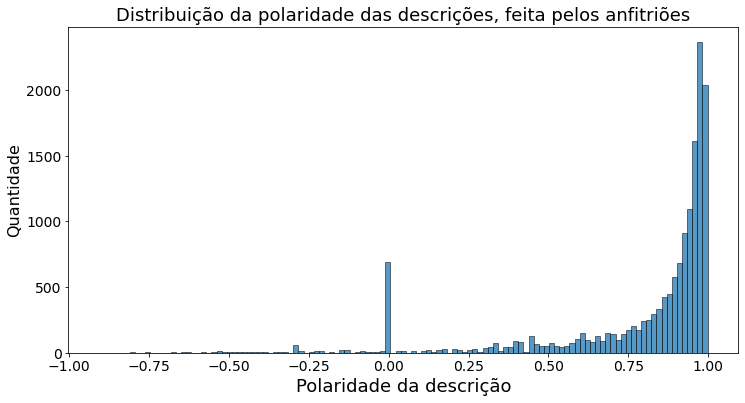

In [20]:

plt.figure(figsize=(12,6))
ax=sns.histplot(df_processed['description_polarity'])
plt.title('Distribuição da polaridade das descrições, feita pelos anfitriões',fontsize=18)
plt.xlabel('Polaridade da descrição',fontsize=18)
plt.ylabel('Quantidade',fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

ax.figure.savefig(final_figures+"Imoveis.jpeg",format='jpeg', dpi=300)

## Analisando as duas piores e as duas melhroes avaliações, conforme polaridade

In [37]:
#DEBUG: Buscar por ID individual, antes do processamento.
#raw_df = pd.read_csv(file_toronto_listings, index_col = 'id')
#pd.set_option('display.max_colwidth', None)
#raw_df.filter(like='2979246', axis=0).description

id
2979246    Our 2 bedroom home is in the heart of Riverdale, a block from the TTC, 2 beautiful parks, and the vibrant Danforth and Leslieville areas. We are minutes from downtown, but in an amazing residential area with mature trees and great people. Newly decorated and furnished, this is a beautiful and comfortable house in a prime neighbourhood.  A perfect summer oasis and home away from home.<br /><br /><b>The space</b><br />This newly renovated, 100+ year old home has all the comfort and amenities you could want in one of Toronto's most popular and vibrant neighbourhoods.  This is our home, and not a rental property, so all beds, furniture, kitchen ware etc has been chosen with care for style and comfort. The backyard features 2 decks with a small table for 4 perfect for breakfast in the sun, and a larger patio with a table that seats 6/8.  The lovely covered front porch has great seating for end of the afternoon sunshine. The house is ideally suited for a family.<br /><br /><b>G

In [21]:
pd.set_option('display.max_colwidth', None)

# Pior Descrição
print(df_processed.iloc[[-1]])



                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  description_polarity
id                                                                                                                 

In [22]:
# Segunda pior
print(df_processed.iloc[[-2]])

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                description  description_polarity
id                                                                                                                                                                                                                                                                                                    

In [23]:
# Melhor descrição
print(df_processed.iloc[[0]])
#print(df_n.loc[df_n.index==26662976].description)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            description  description_polarity
id        

In [24]:
# Segunda Melhor descrição
print(df_processed.iloc[[1]])

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              description  \
id         

## Gerando uma núvem de palavras com as descrições mais positivas

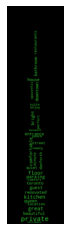

In [25]:
mask = np.array(Image.open("./masks/cn_tower_toronto_mask.png"))
positive_text = str(df_processed[lambda x: x['description_polarity'] >= 0.5])

# adding movie script specific stopwords
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")
stopwords.add("id")
stopwords.add("due")
stopwords.add("msg")
stopwords.add("couldn")
stopwords.add("bedroom")
stopwords.add("studio")
stopwords.add("apartment")
stopwords.add("condo")
stopwords.add("den")
stopwords.add("plus")
stopwords.add("description_polarity")

wc = WordCloud(background_color="black",max_words=2000, mask=mask, stopwords=stopwords, color_func=lambda *args, **kwargs: (50, 205, 50), min_word_length=5, min_font_size=10, width=1000, height=1000, max_font_size=200).generate(positive_text)
wc.to_file(final_figures+'wordcloud_listing_descriptions.png')

# store default colored image
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
